In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

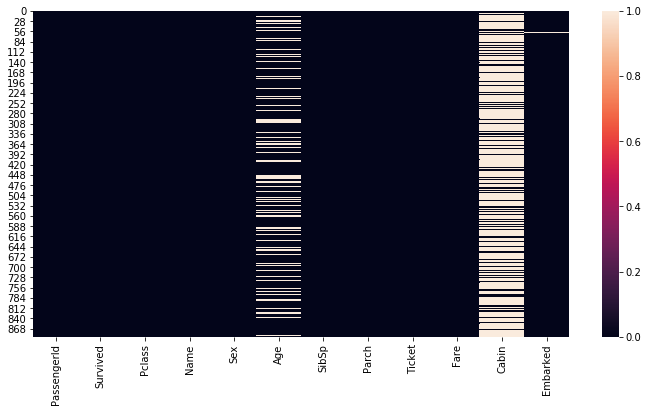

In [4]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())

In [5]:
sns.set_style('whitegrid')

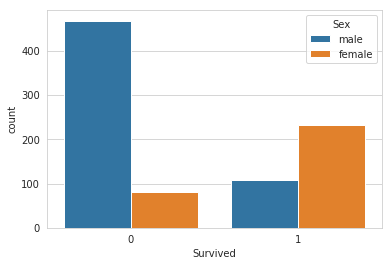

In [6]:
sns.countplot(x='Survived', data=train, hue='Sex')

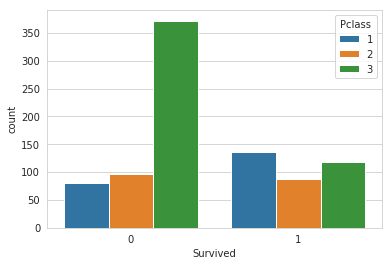

In [7]:
sns.countplot(x='Survived', data=train, hue='Pclass')

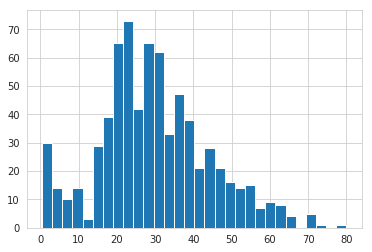

In [8]:
train['Age'].hist(bins=30)

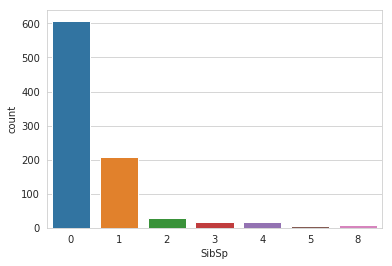

In [9]:
sns.countplot(x='SibSp', data=train)

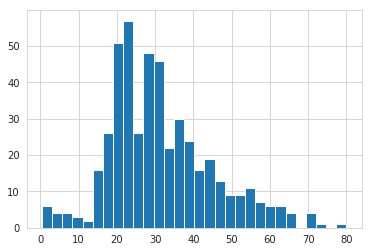

In [10]:
train[train['SibSp'] == 0]['Age'].hist(bins=30)

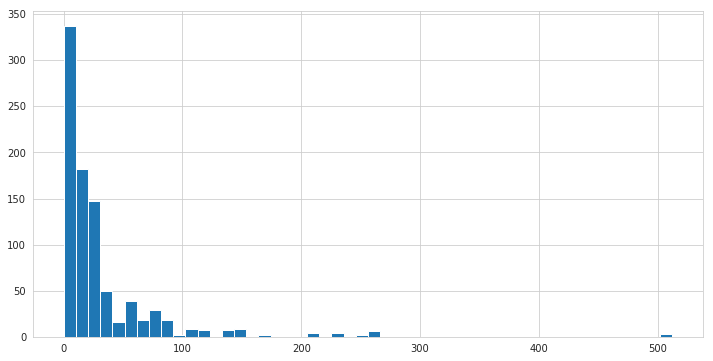

In [11]:
train['Fare'].hist(bins=50, figsize=(12,6))

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=train)

# você vai perceber que na classe 1, a média é de idades é de aproximadamente 37  anos
# classe 2, a média das idades é de 29 anos
# classe 3, a média das idades é de 24

In [13]:
def inputar_idade(cols):
    idade = cols[0]
    classe = cols[1]
    
    if pd.isnull(idade):
        if classe == 1:
            return 37
        elif classe == 2:
            return 29
        else:
            return 24
    else:
        return idade

In [14]:
train['Age'] = train[['Age', 'Pclass']].apply(inputar_idade, axis=1)

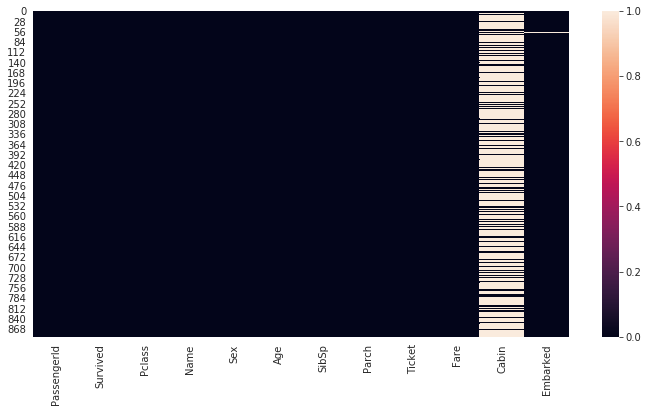

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())

In [16]:
del train['Cabin']

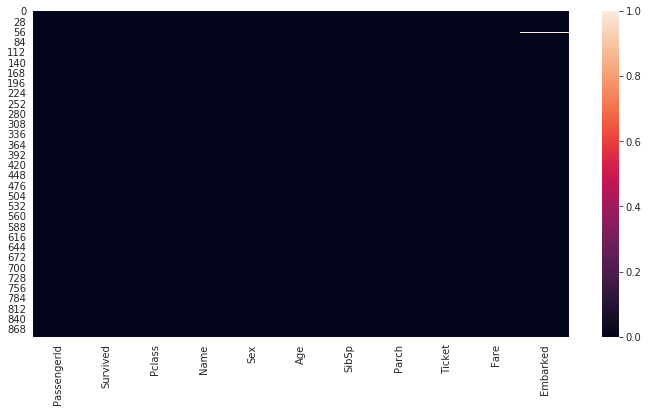

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull())

In [18]:
# vai apagar as linhas onde ele encontrar informações NaN. No nosso caso será a informa. No caso tem uma informação
# NaN em Embarked
train.dropna(inplace=True) 
#train[train['Embarked'].isnull()]

In [19]:
sex = pd.get_dummies(train['Sex'], drop_first=True) # classifica e atribui número para os diferentes tipos de sexos
sex.head()

male
0     1
1     0
2     0
3     0
4     1

In [20]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
# mais uma vez transformando variável categórica em numérica
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [22]:
train.drop(['Sex', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)
#train.head()

In [23]:
# concatenando dataframes
train = pd.concat([train, embark, sex], axis=1) # axis = 1, diz que queremos concatenar nas colunas
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Q  S  male
0         0       3  22.0      1      0   7.2500  0  1     1
1         1       1  38.0      1      0  71.2833  0  0     0
2         1       3  26.0      0      0   7.9250  0  1     0
3         1       1  35.0      1      0  53.1000  0  1     0
4         0       3  35.0      0      0   8.0500  0  1     1

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
# estou quebrando meus dados em teste e treino
# fiz train.drop('Survived', axis=1) para não passar essa coluna para o split
# o x é o train.drop('Survived', , axis=1)
# e y é o train['Survived']

X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3)

In [28]:
logmodel = LogisticRegression()

In [29]:
logmodel.fit(X_train, y_train) # criando o modelo

/home/rodrigords/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
predictions = logmodel.predict(X_test) # fazendo a predição dos y

In [31]:
from sklearn.metrics import classification_report

In [32]:
# vai imprimir informações comparando y_teste e as predições
# a precision diz o quanto nosso modelo acerto. Vemos que no geral tivemos 80 % de acerto
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       161
           1       0.84      0.72      0.78       106

   micro avg       0.84      0.84      0.84       267
   macro avg       0.84      0.82      0.82       267
weighted avg       0.84      0.84      0.83       267



In [33]:
from sklearn.metrics import confusion_matrix